In the first chapter, you have learned about different components of Spark namely, Spark Core, Spark SQL, and Spark MLlib. In this chapter, we will start with RDDs which are Spark’s core abstraction for working with data.

## Introduction to PySpark RDD

### What is RDD?
RDD = **R**esilient **D**istributed **D**ataset

- RDD is the fundamental and backbone data type in PySpark.
- When Spark starts processing data, it divides the data into partitions and distributes the data across cluster nodes, with each node containing a slice of data.

![rdds](./media/rdds.png)

### Decomposing RDDs
- Resilient Distributed Datasets
- `Resilient:` Ability to withstand failures
- `Distributed:` Spanning across multiple machines
- `Datasets:` Collection of partitioned data e.g, Arrays, Tables, Tuples etc.,


### Creating RDDs. How to do it?
- Parallelizing an existing collection of objects
- External datasets:
    - Files in HDFS
    - Objects in Amazon S3 bucket
- lines in a text 

#### Parallelized collection (parallelizing)
- `parallelize()` for creating RDDs from python list

In [1]:
#importing Libraries
from pyspark import SparkConf
from pyspark.context import SparkContext

#creating SparkContext
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

In [2]:
numRDD = sc.parallelize([1,2,3,4])

In [3]:
helloRDD = sc.parallelize("Hello world")

In [4]:
print(type(helloRDD))

<class 'pyspark.rdd.RDD'>


In [5]:
print(type(numRDD))

<class 'pyspark.rdd.RDD'>


#### From external datasets
- `textFile()` for creating RDDs from external datasets

In [6]:
fileRDD = sc.textFile("README.md")

In [7]:
print(type(fileRDD))

<class 'pyspark.rdd.RDD'>


### Understanding Partitioning in PySpark

- A partition is a logical division of a large distributed data set
- `parallelize()` method

In [8]:
numRDD = sc.parallelize(range(10), numSlices = 6)

- `textFile()` method

In [9]:
fileRDD = sc.textFile("README.md", minPartitions = 6)

The number of partitions in an RDD can be found by using `getNumPartitions()` method

In [10]:
# Check the number of partitions in fileRDD
print("Number of partitions in fileRDD is", fileRDD.getNumPartitions())

Number of partitions in fileRDD is 7


In [11]:
# Create a fileRDD_part from file_path with 5 partitions
file_path = "./README.md"
fileRDD_part = sc.textFile(file_path, minPartitions = 5)

In [12]:
# Check the number of partitions in fileRDD_part
print("Number of partitions in fileRDD_part is", fileRDD_part.getNumPartitions())

Number of partitions in fileRDD_part is 6


## RDD operations in PySpark

### Overview of PySpark operations
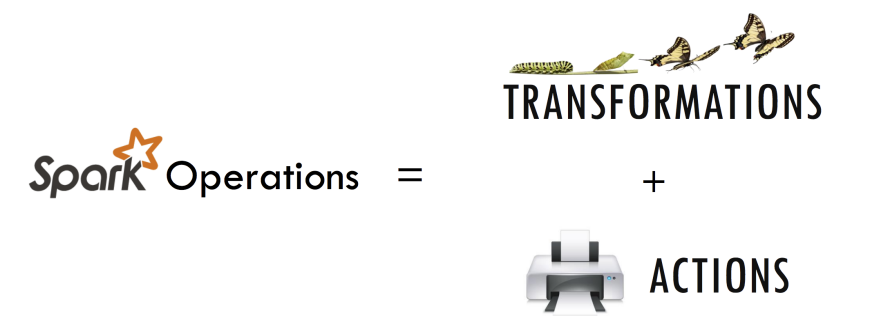

- Transformations create new RDDS
- Actions perform computation on the RDDs

### RDD Transformations
- Transformations follow Lazy evaluation
- feature which helps RDDs in fault tolerance and optimizing resource use is the lazy evaluation.
- So what is **lazy evaluation?** 
- Spark creates a graph from all the operations you perform on an RDD and execution of the graph starts only when an action is performed on RDD as shown in this figure. This is called lazy evaluation in Spark.

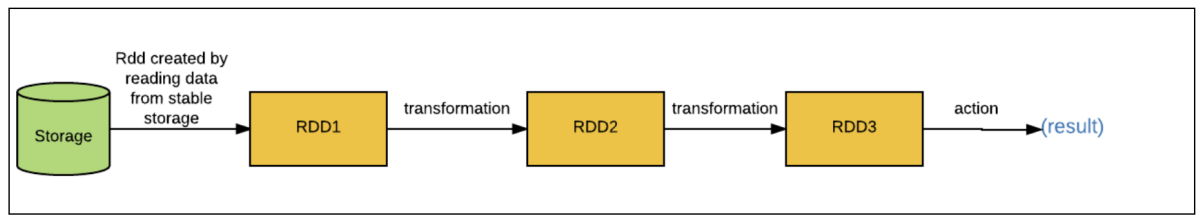

- Basic RDD Transformations `map()` , `filter()` , `flatMap()` , and `union()`


#### `map()` Transformation
- `map()` transformation applies a function to all elements in the RDD
![map](media/map.png)

In [13]:
RDD = sc.parallelize([1,2,3,4])
RDD_map = RDD.map(lambda x: x * x)

#### `filter()` Transformation
- Filter transformation returns a new RDD with only the elements that pass the condition
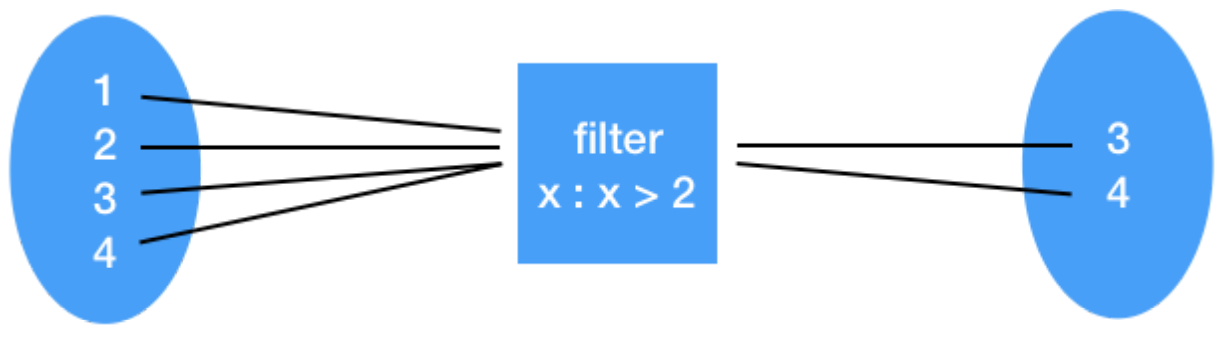

In [14]:
RDD = sc.parallelize([1,2,3,4])
RDD_filter = RDD.filter(lambda x: x > 2)

#### `flatMap()` Transformation
- flatmap() transformation return multiple values for each element in the original RDD
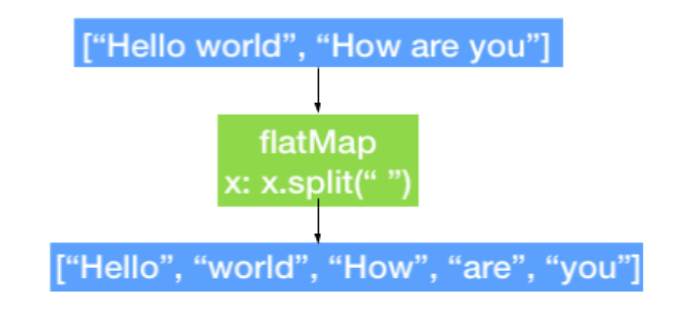

In [15]:
RDD = sc.parallelize(["hello world","how are you"])
RDD_flatmap = RDD.flatMap(lambda x: x.split(" "))

#### `union()` Transformation
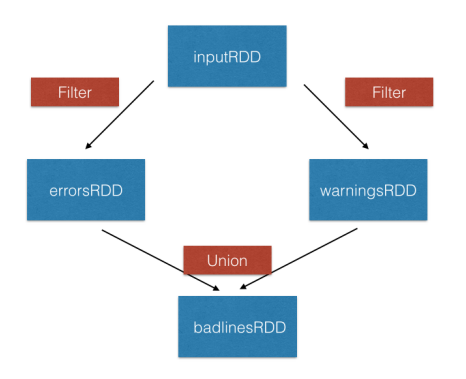


In [6]:
inputRDD = sc.parallelize([1,2,3,4,5,6,7,8,9])
errorRDD = inputRDD.filter(lambda x: (x%2==0) in x.split())
warningsRDD = inputRDD.filter(lambda x: (x%2!=0) in x.split())
combinedRDD = errorRDD.union(warningsRDD)

### RDD Action
- Operation return a value after running a computation on the RDD
 -Basic RDD Actions
    - `collect()`
    - `take(N)`
    - `first()`
    - `count()`

#### `collect()` and `take()` Actions
- `collect()` return all the elements of the dataset as an array
- `take(N)` returns an array with the 

In [21]:
inputRDD = sc.parallelize([1,2,3,4,5,6,7,8,9])

In [22]:
inputRDD.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
inputRDD.take()

#### `first()` and `count()` Actions
- first() print the first element of the RDD

In [ ]:
inputRDD.first()

- `count()` return the number of elements in the RDD

In [ ]:
inputRDD.count()

###  Working with Pair RDD's in PySpark
- Real life datasets are usually key/value pairs
- Each row is a key and maps to one or more values
- Pair RDD is a special data structure to work with this kind of datasets
- Pair RDD: Key is the identi

#### Creating pair RDDs
- Two common ways to create pair RDDs
    - From a list of key-value tuple
    - From a regular RDD
- Get the data into key/value form for paired RDD

In [ ]:
my_tuple = [('Sam', 23), ('Mary', 34), ('Peter', 25)]
pairRDD_tuple = sc.parallelize(my_tuple)

In [ ]:
my_list = ['Sam 23','Mary 34','Peter 25']
regularRDD = sc.parallelize(my_list)
pairRDD_RDD = regularRDD.map(lambda s: (s.split(' ')[0], s.split(' ')[1]))

#### Transformations on pair RDDs
All regular transformations work on pair RDD
Have to pass functions that operate on key value pairs rather than on individual elements
Examples of paired RDD Transformations
- `reduceByKey(func)`: Combine values with the same key
- `groupByKey()`: Group values with the same key
- `sortByKey()`: Return an RDD sorted by the key
- `join()`: Join two pair RDDs based on their key


#### reduceByKey() transformation
- `reduceByKey()` transformation combines values with the same key
- It runs parallel operations for each key in the dataset
- It is a transformation and not action

In [ ]:
regularRDD = sc.parallelize([("Messi", 23), ("Ronaldo", 34),("Neymar", 22), ("Messi", 24)])
pairRDD_reducebykey = regularRDD.reduceByKey(lambda x,y : x + y)
pairRDD_reducebykey.collect()

#### sortByKey() transformation
- `sortByKey()` operation orders pair RDD by key
- It returns an RDD sorted by key in ascending or descending order

In [ ]:
pairRDD_reducebykey_rev = pairRDD_reducebykey.map(lambda x: (x[1], x[0]))
pairRDD_reducebykey_rev.sortByKey(ascending=False).collect()

#### groupByKey() transformation
- `groupByKey()` groups all the values with the same key in the pair RDD

In [ ]:
airports = [("US","JFK"),("UK","LHR"),("FR","CDG"),("US","SFO")]
regularRDD = sc.parallelize(airports)
pairRDD_group = regularRDD.groupByKey().collect()
for cont, air in pairRDD_group:
    print(cont, list(air))

#### join() transformation
- `join()` transformation joins the two pair RDDs based on their key

In [ ]:
RDD1 = sc.parallelize([("Messi", 34),("Ronaldo", 32),("Neymar", 24)])
RDD2 = sc.parallelize([("Ronaldo", 80),("Neymar", 120),("Messi", 100)])

In [ ]:
RDD1.join(RDD2).collect()

### Advance RDD's Acction

#### reduce() action
- `reduce(func)` action is used for aggregating the elements of a regular RDD
-  The function should be commutative (changing the order of the operands does not change
the result) and associative
- An example of `reduce()` action in PySpark

In [ ]:
x = [1,3,4,6]
RDD = sc.parallelize(x)
RDD.reduce(lambda x, y : x + y)

#### saveAsTextFile() action
`saveAsTextFile()` action saves RDD into a text file inside a directory with each partition as
a separate 

In [ ]:
RDD.saveAsTextFile("tempFile")

`coalesce()` method can be used to save RDD as a single text 

In [ ]:
RDD.coalesce(1).saveAsTextFile("tempFile")

#### Action Operations on pair RDDs
- RDD actions available for PySpark pair RDDs
- Pair RDD actions leverage the key-value data
- Few examples of pair RDD actions include
    - countByKey()
    - collectAsMap()


#### countByKey() action
- `countByKey()` only available for type (K, V)
- `countByKey()` action counts the number of elements for each key
- Example of `countByKey()` on a simple list

In [ ]:
rdd = sc.parallelize([("a", 1), ("b", 1), ("a", 1)])
for kee, val in rdd.countByKey().items():
    print(kee, val)

#### collectAsMap() action
- `collectAsMap()` return the key-value pairs in the RDD as a dictionary
- Example of `collectAsMap()` on a simple tuple

In [ ]:
sc.parallelize([(1, 2), (3, 4)]).collectAsMap()

# EXERCISE

- Create an RDD named RDD from a list of words.
- Confirm the object created is RDD.

In [ ]:
# Create an RDD from a list of words
RDD = sc.____(["Spark", "is", "a", "framework", "for", "Big Data processing"])

# Print out the type of the created object
print("The type of RDD is", ____(RDD))

- create the file_path in the PySpark shell.
- Create an RDD named fileRDD from a file_path.
- Print the type of the fileRDD created.

In [ ]:
# createfile_path
file_path = _____

# Print the file_path
print("The file_path is", ____)

# Create a fileRDD from file_path
fileRDD = sc.____(file_path)

# Check the type of fileRDD
print("The file type of fileRDD is", type(____))

- Find the number of partitions that support fileRDD RDD.
- Create an RDD named fileRDD_part from the file path but create 5 partitions.
- Confirm the number of partitions in the new fileRDD_part RDD.

In [ ]:
# Check the number of partitions in fileRDD
print("Number of partitions in fileRDD is", fileRDD.____)

# Create a fileRDD_part from file_path with 5 partitions
fileRDD_part = sc.textFile(____, minPartitions = ____)

# Check the number of partitions in fileRDD_part
print("Number of partitions in fileRDD_part is", fileRDD_part.____)

- Create map() transformation that cubes all of the numbers in numbRDD.
- Collect the results in a numbers_all variable.
- Print the output from numbers_all variable.

In [ ]:
# Create map() transformation to cube numbers
cubedRDD = numbRDD.map(lambda x: ____)

# Collect the results
numbers_all = cubedRDD.____()

# Print the numbers from numbers_all
for numb in ____:
    print(____)

- Create `filter()` transformation to select the lines containing the keyword Spark in README.txt.
- How many lines in `fileRDD_filter` contains the keyword `Spark`?
- Print the first four lines of the resulting RDD.

In [ ]:
# Filter the fileRDD to select lines with Spark keyword
fileRDD_filter = fileRDD.filter(lambda line: 'Spark' in ____)

# How many lines are there in fileRDD?
print("The total number of lines with the keyword Spark is", fileRDD_filter.____())

# Print the first four lines of fileRDD
for line in fileRDD_filter.____(____):
    print(line)

- Create a pair RDD named `Rdd` with tuples `(1,2),(3,4),(3,6),(4,5)`.
- Transform the `Rdd` with `reduceByKey()` into a pair RDD `Rdd_Reduced`x by adding the values with the same key.
- Collect the contents of pair RDD `Rdd_Reduced` and iterate to print the output.

In [ ]:
# Create PairRDD Rdd with key value pairs
Rdd = sc.parallelize([____])

# Apply reduceByKey() operation on Rdd
Rdd_Reduced = Rdd.reduceByKey(lambda x, y: ____)

# Iterate over the result and print the output
for num in Rdd_Reduced.____: 
  print("Key {} has {} Counts".format(____, num[1]))

- Sort the `Rdd_Reduced` RDD using the key in descending order.
- Collect the contents and iterate to print the output.

In [ ]:
# Sort the reduced RDD with the key by descending order
Rdd_Reduced_Sort = Rdd_Reduced.____(ascending=False)

# Iterate over the result and retrieve all the elements of the RDD
for num in Rdd_Reduced_Sort.____():
  print("Key {} has {} Counts".format(____, num[1]))

- Count the unique keys and assign the result to a variable `total`.
- What is the type of `total`?
- Iterate over the `total` and print the keys and their counts.

In [ ]:
# Count the unique keys
total = Rdd.____()

# What is the type of total?
print("The type of total is", ____(total))

# Iterate over the total and print the output
for k, v in total.___(): 
  print("key", ____, "has", ____, "counts")

- Create an RDD called `baseRDD` that reads lines from `file_path`.
- Transform the `baseRDD` into a long list of words and create a new `splitRDD`.
- Count the total words in `splitRDD`.

In [ ]:
# Create a baseRDD from the file path
baseRDD = sc.____(file_path)

# Split the lines of baseRDD into words
splitRDD = baseRDD.____(lambda x: x.split())

# Count the total number of words
print("Total number of words in splitRDD:", splitRDD.____())

- Convert the words in `splitRDD` in lower case and then remove stop words from stop_words curated list.
- Create a pair RDD tuple containing the word and the number `1` from each word element in `splitRDD`.
- Get the count of the number of occurrences of each word (word frequency) in the pair RDD.

In [ ]:
# Convert the words in lower case and remove stop words from the stop_words curated list
splitRDD_no_stop = splitRDD.____(lambda x: x.lower() not in ____)

# Create a tuple of the word and 1 
splitRDD_no_stop_words = splitRDD_no_stop.map(lambda w: (____, ____))

# Count of the number of occurences of each word
resultRDD = splitRDD_no_stop_words.____(lambda x, y: x + y)

##### Thank you :)